# Titanic 

### Przeanalizowanie zadania

Mam zamiar wyuczyc model, który przewidzi czy pasażer Titanica przeżyje.

Mamy tu do czynienia z klasycznym zadaniem uczenia nadzorowanego, poniewaz wykorzystujemy dane wejściowe z oznakowanymi etykietami zeby nauczyc model przewidywac wynik
Klasycznym przykładem uczenia nazdzorowanego jest klasyfikacja binarna która przewiduje jedną z dwóch klas (0 i 1). W tym przypadku przewidujemy wartość kategoryczną (dyskretną). Zmienna docelowa Survived przyjmuje dwie wartości 0( nie przeżył) lub 1 (przeżył)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

#### Wczytywanie danych

In [2]:
train  = pd.read_csv('https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Titanic/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Titanic/input/test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


#### Analiza danych Treningowych 
Przeprowadze analize danych w celu zrozumienia struktury danych

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Wnioski z Analizy

W zbiorze treningowym mamy 891 wierszy i 12 cech

W zbiorze testowym mamy 418 wierszy i 11 cech (zostala usunieta wartosc docelowa)

Typy danych które znajduja sie w zbiorze treningowym to:
- 2 cechy z liczbami zmiennoprzecinkowymi
- 5 cech z liczbami naturalnymi 
- 5 cech z typem object, co oznacza ze mozna tu przechowywac dowolny obiekt, które po sprawdzeniu kilku losowych wartosci sa to zmienne tekstowe

W kolumnach Age, Cabin i Embarked brakuje wartości 

Po przyjrzeniu sie zbiorowi danychwartosci w kolumnie Sex,Pclass,Embarked,Survived,SibSp są powtarzalne to oznacza ze mamy do czynienia z atrybutami kategorialnymi.

### Analiza Danych Testowych

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Wizualizacja danych

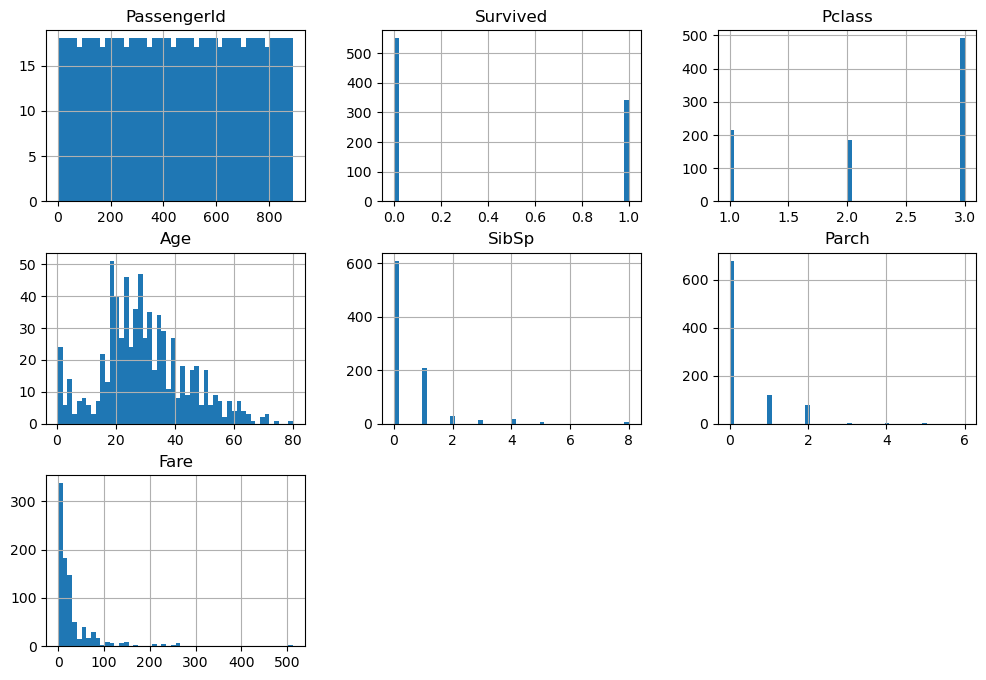

In [9]:
#histogramy przedstawiaja liczbe przykładów (w pionowej osi ) znajdujacych sie w okreslonym przedziale wartosci (os pozioma)

train.hist(bins = 50, figsize = (12,8))
plt.show()

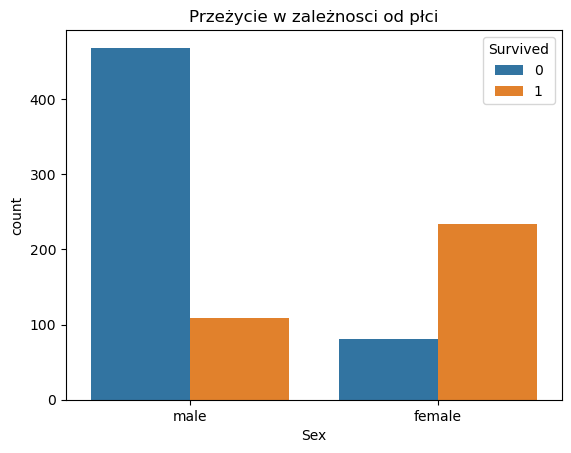

In [10]:
sns.countplot(x='Sex',hue ='Survived', data = train)
plt.title('Przeżycie w zależnosci od płci')
plt.show()

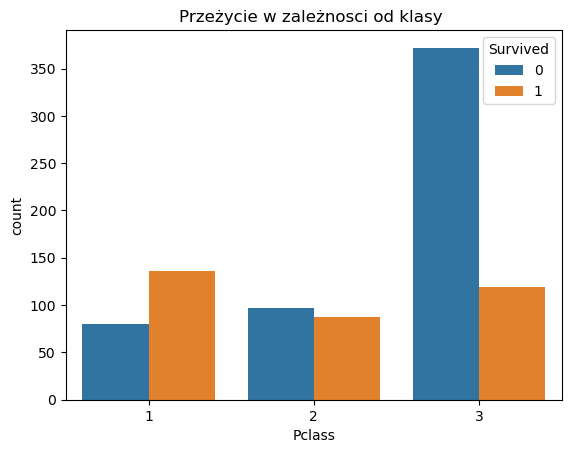

In [11]:
sns.countplot(x='Pclass',hue = "Survived", data = train)
plt.title('Przeżycie w zależnosci od klasy ')
plt.show()

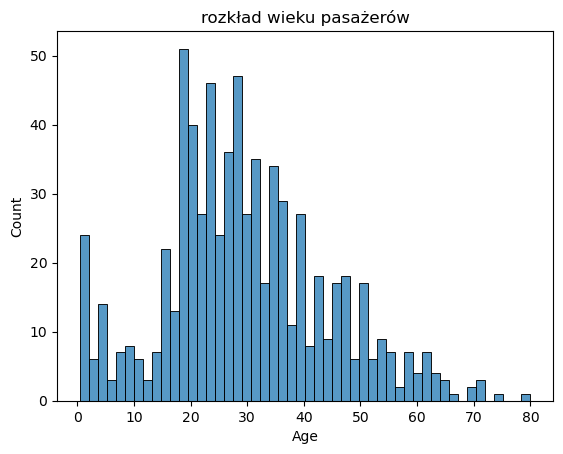

In [12]:
sns.histplot(train['Age'].dropna(), bins= 50)
plt.title('rozkład wieku pasażerów')
plt.show()

### Wnioski z Wizualizacji danych

- Wiecej osob zgineło niz przezyło
- Klasa 3 jest najliczniejsza
- Najlicznijszy przedział wieku na statku to około od 18 do 40 lat
- Wiekszosc pasarzerów na statku nie ma rodzenstwa małżonków, rodziców ani dzieci 
- Kobiety w znacznej wiekszosci przeżyły katastrofe
- Najwiecej ludzi zgineło z klasy 3

### Oczyszczanie danych 

Wiekszosc algorytmów uczenia maszynowego nie moze działac jesli brakuje jakichs cech istnieja trzy mozliwosci:
- pozbyc sie brakujących danych
- pozbyc sie całego atrybutu
- imputacja uzupełnic brakujace dane okreslona wartoscia (zero, srednia, mediana)

Na podstawie wyciagnietych wniosków najbardziej racjonalnym rozwiazaniem bedzie:
- kolumne Age uzupełnic brakujace wartosci mediana
- kolumne Cabin usunąc z powodu duzej liczby brakujących wartości
- kolumne Embarked uzupełnic najczesciej wystepująca wartoscią


In [13]:
#wypełniam puste miejsca w kolumnie Age mediana a w kolumnie Embarked najczesciej wystepowana wartoscia

train['Age'] = train["Age"].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

test['Age'] = test["Age"].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [14]:
#usuniecie kolumny Cabin
train.drop(['Cabin'],axis= 1, inplace = True)
test.drop(['Cabin'],axis= 1, inplace = True)


In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Zamiana wartosci kategorialnych na numeryczne
Algorytmy uczenia maszynowego lepiej sobie radza z liczbami, wiec koniecznie musze przekształcic dane kategorialne z tekstu na wartosci numeryczne.


In [16]:
#train['Sex'] = train['Sex'].map(lambda x: 0 if x=='male'else 1)
gender_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(gender_mapping)
test['Sex'] = test['Sex'].map(gender_mapping)

In [17]:
emb = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(emb)
test['Embarked'] = test['Embarked'].map(emb)


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


### Punkt odniesienia 
Zbuduje model który bedzie punktem odniesienia dla kolejnych kroków 

Podzieliłem zbiór danych na zestaw treningowy i walidacyjny mimo ze jest osobny zestaw testowy ponieważ:
- zbiór testowy nie zawiera kolumny docelowej Survived, oznacza to ze nie mozemy ocenic wydajnosci modelu na tym zbiorze
Podział zbioru treningowego na treningowy i walidacyjny pozwoli na rzetelną ocene modeli oraz jego optymalizacje przed koncowym przewidywaniem na zbiorze testowym.

Jest kilka metod podziału danych:
- najprostrza metoda jest losowy podział danych treningowych na dwa zbioy w poroporcji 80 od 20
- bardziej zaawansowaną metodą jest walidacja krzyzowa która polaga na podziale na k podzbiorów i iteracynym treningu i walidacji modelu, aby wykorzystac wszystkie dane efektywnie 

Walidacja krzyżowa jest lepsza metoda walidacji modelu niz prosty podział danych na zestaw treningowy i walidacyjny, zwłaszcza gdy dysponujemy ograniczoną iloscia danych. Ocena modelu opiera sie na sredniej wyników z kilku iteracji, jest mniej podatna na przypadkowe wahania wynikajace z pojedynczego podziału danych

Usune cechy takie Name, Ticket poniewaz sa one niewłasciwymi typami dla algorytmów uczenia maszynowego



In [19]:
from sklearn.model_selection import cross_val_score 

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

X = train.drop(['Survived','Name','Ticket'], axis =1)
y = train['Survived']


In [20]:
cross_val_score(DummyClassifier(strategy='stratified',random_state= 42),X,y, scoring ='accuracy', cv=3).mean()

0.510662177328844

DummyClassifier to bardzo prosty klasyfikator któy słuzy jako punkt odniesienia. 

In [21]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.7654320987654321

In [22]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=2019), X, y, scoring='accuracy', cv=3).mean()

0.8148148148148149

Inna mozliwoscia jest walidacja danych za pomoca StratifiedKFold. Uzywany jest gdy rozkład klas w danych jest nierónomierny, zachowuje proporcje klas w kazdym foldzie. 

In [23]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=7, shuffle = True, random_state=42)

cross_val_score(DummyClassifier(strategy='stratified',random_state= 42),X,y, cv=skf).mean()


0.5240965973003374

In [24]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=skf).mean()

0.8192843082114737

In [25]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=skf).mean()

0.8271231721034872

In [26]:
#from scikitplot.estimators import plot_learning_curve

#plot_learning_curve(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=skf);

Wykres przedstawia krzywą uczenia sie dla modelu RandomForestClassifier.
Mozemy zobaczyc jak model radzi sobie na zbiorze treningowym i walidacyjnym w zależnosci od liczby przykładów treningowych.
- czerwona linia przedstawia wynik modelu na zbiorze treningowym
- zielona linia przedstawia wynik modelu na zbiorze walidacyjnym uzyskany poprzez walidacje krzyzową
- obszary zaciennione przedstawiaja odchyylenia standarodwe dla obu krzywych

#### Interpretacja wyniku
Wynik na zbiorze treningowym (czerowona linia)
- Poczatkowo przy mniejszych zbiorach treningowych (100-200 przykładów), model osiaga bardzo wysoką skutecznosc na zbiorze treningowym (ok. 0,88). Lecz w miare zwiekszenia liczby przykładów treningowych, wynik na zbiorze treningowym spada (ok. 0,83) ale stabilizuje sie przy wiekszych rozmiarach zestawu danych (od ok 400 przykładów). Ten spadek wynika z tego że przy wiekszych zestawach danych model musi dopasowywac bardziej zróżnicowane przypadki.
Wyniki na zbiorze walidacyjnym 
- Wynik walidacyjny zaczyna od wartości około 0.78 i stopniowo rośnie do około 0.82, co pokazuje, że model poprawia swoją zdolność, gdy liczba przykładów treningowych wzrasta. Krzywa ta rośnie powoli i stabilnie, co sugeruje, że model potrzebuje więcej danych. Warto zauważyć, że wyniki walidacyjne są mniej stabilne (większe odchylenie standardowe), co jest widoczne na zacieniowanym obszarze wokół zielonej linii.

Poprzez zastosowanie StratifiedKFold podniosła sie poprawnosc modelu.

### Tworzenie nowych cech 


Wyciagniemy tytuł z imienia i uzyjemy ich jako cechy 

In [27]:
train['title'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test['title'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [28]:
from collections import defaultdict


top_titles = list(train['title'].value_counts().head(6).keys()) # tworzy liste tytułów pasażerów która zlicza wystapienia,
# wybiera pierwsze 6 i zwraca tytuły(klucze) 
top_titles_test = list(test['title'].value_counts().head(6).keys())  # Dla test
title_norm = defaultdict(lambda: 'other', dict(zip(top_titles, top_titles))) #funkcja łaczy 2 listy poprzez zip i tworzy słownik z (klucz, wartosc)
# tworzy słownik który zwroci domyslna wartośc other dla kluczy które nie istnieja 

title_norm_test = defaultdict(lambda: 'other', dict(zip(top_titles_test, top_titles_test))) #funkcja łaczy 2 listy poprzez zip i tworzy słownik z (klucz, wartosc)

train['title_norm'] = train['title'].map(title_norm)
train['title_norm'].value_counts()

test['title_norm'] = test['title'].map(title_norm_test)


In [29]:
train['title_norm'] = train['title_norm'].factorize()[0] #konwertuje dane na liczby 
test['title_norm'] = test['title_norm'].factorize()[0] 


In [30]:
train['title_norm'].value_counts()

0    517
2    182
1    125
3     40
4     14
6      7
5      6
Name: title_norm, dtype: int64

In [31]:
train['age_mean_title'] = train.groupby('title_norm')['Age'].mean()

Stworze zmnienną która sumuje wartosci z kolumn SibSp i Parch 

In [32]:
train['FamilySize'] = train['SibSp'] + train['Parch'] +1
train['single'] = train['FamilySize'] == 1
train['child'] = train['Age']<18
train['adult'] = train['Age'] >= 18

test['FamilySize'] = test['SibSp'] + test['Parch'] +1
test['single'] = test['FamilySize'] == 1
test['child'] = test['Age']<18
test['adult'] = test['Age'] >= 18


train[['Parch','SibSp','FamilySize','single','Age','child','adult']]

,Parch,SibSp,FamilySize,single,Age,child,adult
0,0,1,2,False,22.0,False,True
1,0,1,2,False,38.0,False,True
2,0,0,1,True,26.0,False,True
3,0,1,2,False,35.0,False,True
4,0,0,1,True,35.0,False,True
...,...,...,...,...,...,...,...
886,0,0,1,True,27.0,False,True
887,0,0,1,True,19.0,False,True
888,2,1,4,False,28.0,False,True
889,0,0,1,True,26.0,False,True


In [33]:
def mom(row):
    if row['Sex'] == 0 :return False
    if row['Age'] < 18 :return False
    if row['FamilySize'] == 1 :return False
    if row['title'] == 2 : return False
    return True

train['is_mom'] = train.apply(mom, axis =1)
test['is_mom'] = test.apply(mom, axis =1)

train['is_mom'].value_counts()

False    747
True     144
Name: is_mom, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

column = ['single','child','adult','title']
for col in column:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Embarked        891 non-null    int64  
 11  title           891 non-null    int32  
 12  title_norm      891 non-null    int64  
 13  age_mean_title  7 non-null      float64
 14  FamilySize      891 non-null    int64  
 15  single          891 non-null    int64  
 16  child           891 non-null    int64  
 17  adult           891 non-null    int

In [36]:
### Training model

In [37]:
X = train.drop(['Survived','Name','Ticket','age_mean_title'], axis =1)
y = train['Survived']


In [38]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,title_norm,FamilySize,single,child,adult,is_mom
0,1,3,0,22.0,1,0,7.2500,0,11,0,2,0,0,1,False
1,2,1,1,38.0,1,0,71.2833,1,12,1,2,0,0,1,True
2,3,3,1,26.0,0,0,7.9250,0,8,2,1,1,0,1,False
3,4,1,1,35.0,1,0,53.1000,0,12,1,2,0,0,1,True
4,5,3,0,35.0,0,0,8.0500,0,11,0,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0,14,5,1,1,0,1,False
887,888,1,1,19.0,0,0,30.0000,0,8,2,1,1,0,1,False
888,889,3,1,28.0,1,2,23.4500,0,8,2,4,0,0,1,True
889,890,1,0,26.0,0,0,30.0000,1,11,0,1,1,0,1,False


In [39]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=3).mean()

0.809203142536476

In [40]:
model = cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=3).mean()
model


0.8215488215488215

In [41]:
from scikitplot.estimators import plot_learning_curve

#plot_learning_curve(model, X, y, cv=3);

Moje zabiegi tworzenia cech nie przyniosły zadnych skutków.
Zamierzam sprawdzic ważnosci cech, usune nieistotne cechy 

postanowiłem ocenic waznosci cech na podstawie tego jak bardzo dana cecha przyczynia sie do zmniejszenia entropii 

In [42]:
model  = RandomForestClassifier(n_estimators= 100, random_state= 42)
model.fit(X,y)

importances = model.feature_importances_

feature_importances = pd.DataFrame({     'Feature': X.columns,
    'Importance': importances})

feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances)

        Feature  Importance
6          Fare    0.178305
0   PassengerId    0.168824
3           Age    0.132440
2           Sex    0.117998
9    title_norm    0.115769
1        Pclass    0.066697
8         title    0.064181
10   FamilySize    0.043626
4         SibSp    0.027201
7      Embarked    0.026826
14       is_mom    0.023670
5         Parch    0.017155
11       single    0.006583
12        child    0.005862
13        adult    0.004863


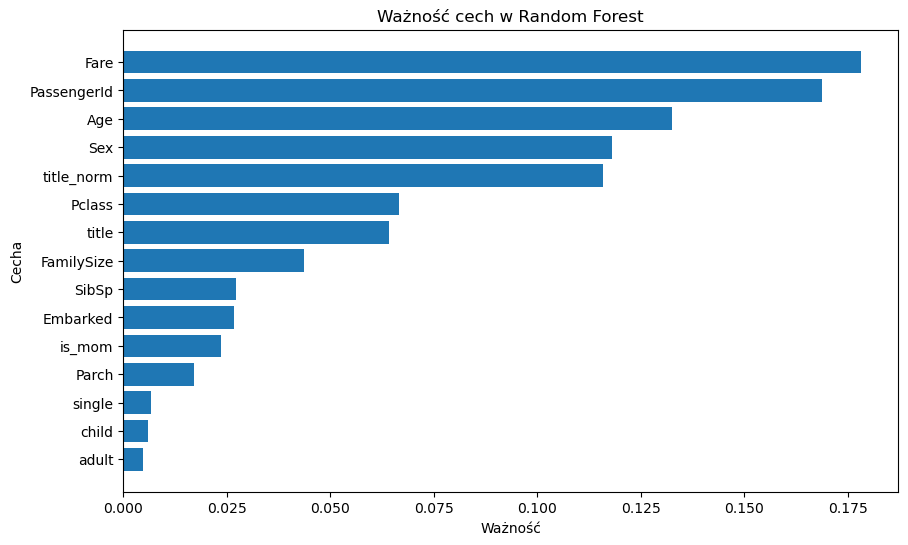

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.title('Ważność cech w Random Forest')
plt.gca().invert_yaxis()
plt.show()

Zastosowanie XGBClassifier 
- XGBoost opiera sie na algorytmie gradient boostingu kóry polega na łaczeniu wileu słabych modeli (zwykle drzew decyzyjnych w celu stworzenia silnego modelu predykcyjnego. Na poczatku tworzy proste przewidywanie (model bazowy) takie jak średnia wartosc. W każdej kolejnej iteracji obliczane sa błedy (reszty) poprzedniego modelu a nowe przewidywania sa suma poprzednich przewidywan i przewidywan nowego modelu, skalowane przez współczyninnik uczenia. prosec jest powtarzany przez okreslana liczbe iteracji.


In [44]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.01
)
cross_val_score(xgb_model, X, y, scoring='accuracy', cv=3).mean()


0.7463524130190797

Dostroje HiperParametry za pomoca RandomizedSearchCV

Najlepsze parametry: {'colsample_bytree': 0.8590760482165449, 'learning_rate': 0.010052037699531582, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 268, 'reg_alpha': 0.0006952130531190704, 'reg_lambda': 1, 'subsample': 0.8042989210310263}
Najlepsza dokładność: 0.8383366141732285


<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

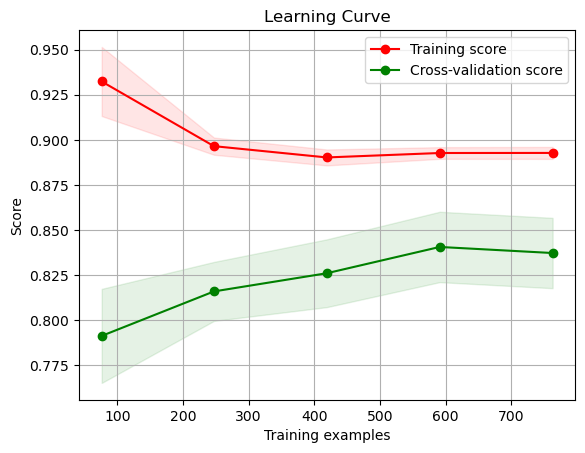

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


param_grid_xgb = {
    'n_estimators': randint(low =10, high = 1000), # oznacza ilosc drzew
    'learning_rate': uniform(0.01, 0.1), # krok uczenia sie(tempo uczenia sie mniejsza wartosc oznacza wolniejsze ale bardziej stabilne uczenie)
    'max_depth': randint(low =1 , high = 7), # maksymalna głebokosc każdego drzewa wartosc None oznacza brak oganiczenia 
    'min_child_weight': randint(low =1, high = 5), #minimalna waga obserwacji dla danego węzła
    'subsample': uniform(0.6, 0.4), # podzbiór na którym model uczy sie (wtedy jak jest overfitting, zmniejsz z 1.0 do 0.8 czy nawet do 0.6).
    'colsample_bytree': uniform(0.6, 0.4), # podobnie jak sample, tylko na kolumnach (cechach). Zmniejsz wtedy gdy pojawia sie overfitting
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': randint(low =1, high = 2)
}

xgb_model_rand = xgb.XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_rand, #model który bedzie optymalizowany 
    param_distributions=param_grid_xgb, #przestrzen hiperparametrów do przeszukania 
    n_iter=100, #liczba losowy kombinacji parametrów do przetestowania 
    scoring='accuracy', # kryterium oceny modelu
    random_state=42, # ziarno dla powtarzalnych wyników
    n_jobs=-1, # pozwala na uzycie wszystkich dostepnych procesów do równoległego przetwarzania
    cv = skf # walidacja stratyfikowana 
)

random_search_xgb.fit(X, y)


best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_
print("Najlepsze parametry:", best_params_xgb)
print("Najlepsza dokładność:", best_score_xgb)

#Robie wykres uczenia sie najlepszego modelu jaki został wytrenowany
plot_learning_curve(random_search_xgb.best_estimator_, X, y, cv=skf)


### Zastosowanie modelu LightGBM

In [46]:
import lightgbm as lgb

# Inicjalizacja modelu LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, verbosity = 0)

# RandomizedSearchCV na całym zbiorze treningowym
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid_xgb,
    n_iter=50, 
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=skf
)

random_search_lgb.fit(X, y)

best_params_lgb = random_search_lgb.best_params_
best_score_lgb = random_search_lgb.best_score_
print("Najlepsze parametry:", best_params_lgb)
print("Najlepsza dokładność:", best_score_lgb)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [47]:
import catboost as ctb

param_grid_ctb = {
    'n_estimators': randint(low =100 , high = 1000), # liczba drzew decyzyjnych
    'learning_rate': uniform(0.01, 0.1), # szybkosc uczenia 
    'depth': randint(low =4 , high = 10),  # maksymalna głebokosc uczenia 
    'l2_leaf_reg': randint(low =3 , high = 8),  # wpływa na regularyzajce modelu, zmniejsza złozonosc drzewa 
    'bagging_temperature': randint(low =0.5 , high = 2),  # kontroluje intensywnosc baggingu czyli losowego wybiernia próbek
    'random_strength':  randint(low =1 , high = 10), # dodaje losowac do drzewa
    'scale_pos_weight': randint(low =1 , high = 3) # 
}

# Inicjalizacja modelu LightGBM
ctb_model = ctb.CatBoostClassifier(random_state=42, verbose=0)

# RandomizedSearchCV na całym zbiorze treningowym
random_search_ctb = RandomizedSearchCV(
    estimator=ctb_model,
    param_distributions=param_grid_ctb,
    n_iter=100,  
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=skf
)

# Trenowanie RandomizedSearchCV
random_search_ctb.fit(X, y)

best_params_ctb = random_search_ctb.best_params_
best_score_ctb = random_search_ctb.best_score_
print("Najlepsze parametry:", best_params_ctb)
print("Najlepsza dokładność:", best_score_ctb)


Najlepsze parametry: {'bagging_temperature': 1, 'depth': 4, 'l2_leaf_reg': 7, 'learning_rate': 0.04985047343973735, 'n_estimators': 621, 'random_strength': 6, 'scale_pos_weight': 1}
Najlepsza dokładność: 0.8394351096737908


Dokładność modelu to : 0.838390559286925
Po tych zabiegach jest to najleszy wynik dokładnosci jaki otrzymałem 

## Wnioski 



### Trenowanie modelu na zbiorze testowym 
Wybiore model kótry ma najlepsza dokładnosc i dokonam predykcji na zbiorze testowym


Średnia dokładność: 0.8383


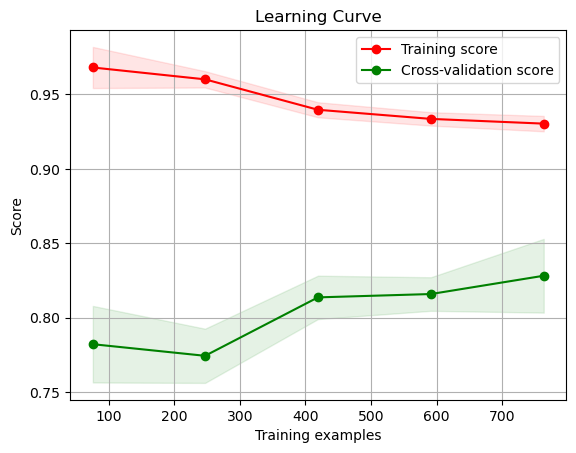

In [48]:
from sklearn.metrics import accuracy_score


final_accuracies = []
final_model = xgb.XGBClassifier(
    **best_params_xgb,
    random_state=42,
    verbosity = 0
)

# Modelowanie za pomocą StratifiedKFold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    final_model.fit(X_train, y_train)
    
    # Przewidywania na zbiorze walidacyjnym
    y_pred = final_model.predict(X_val)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_val, y_pred)
    final_accuracies.append(accuracy)

# Średnia dokładność z 5-fold stratified cross-validation
print(f'Średnia dokładność: {sum(final_accuracies)/len(final_accuracies):.4f}')
plot_learning_curve(xgb_model, X, y, cv=skf);

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    int64  
 10  title        418 non-null    int32  
 11  title_norm   418 non-null    int64  
 12  FamilySize   418 non-null    int64  
 13  single       418 non-null    int64  
 14  child        418 non-null    int64  
 15  adult        418 non-null    int64  
 16  is_mom       418 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(11), object(2)
memory usage: 51.2+ KB


In [50]:
X_test = test.drop(['Name','Ticket'],axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   title        418 non-null    int32  
 9   title_norm   418 non-null    int64  
 10  FamilySize   418 non-null    int64  
 11  single       418 non-null    int64  
 12  child        418 non-null    int64  
 13  adult        418 non-null    int64  
 14  is_mom       418 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(11)
memory usage: 44.6 KB


In [51]:
final_prediction = final_model.predict(X_test)

In [52]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived':final_prediction
})
submission.to_csv("../output/submission.csv", index = False)

## Wnioski

sprawnosc modelu to 0.76794 na stronie kaggle